Comp Introduction.............................

# 1) Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Set the visualizations to show in the notebook
%matplotlib inline

# Adjust the plot style
sns.set(style='whitegrid')

# 2) Import Datasets

In [2]:
# Load the datasets
train_df = pd.read_csv('d_train.csv')
test_df = pd.read_csv('d_test.csv')

# Explore the first few rows of the datasets
print("Training dataset head:")
print(train_df.head())

print("\nTest dataset head:")
print(test_df.head())

# Check the shape of the datasets to understand the number of samples and features
print("Training dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

Training dataset head:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0      

# 3) Exploratory Data Analysis (EDA)

In [3]:
# Display the columns
print(train_df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
# Check for missing values
print(train_df.isnull().sum().max(), "missing values in the training dataset")

0 missing values in the training dataset


- # Visualization and In-depth EDA

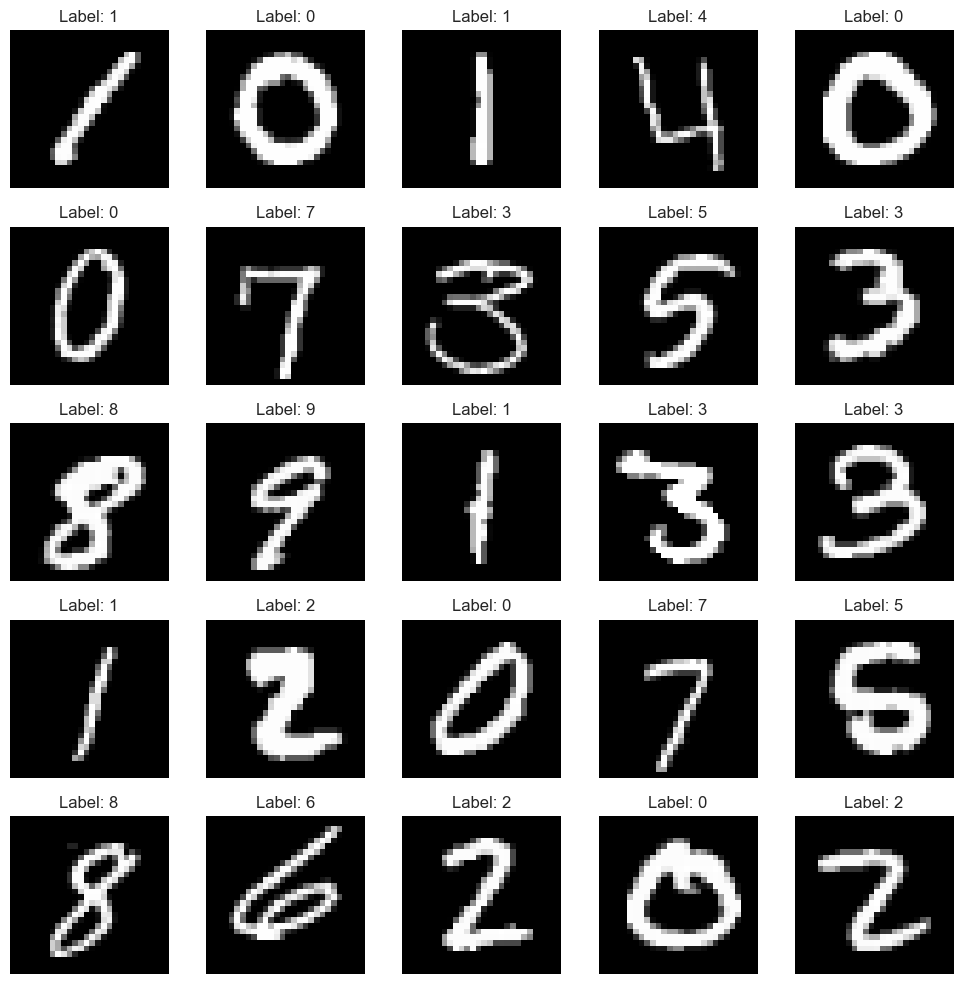

In [5]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(data, rows=5, cols=5):
    fig, ax = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    for r in range(rows):
        for c in range(cols):
            index = r * cols + c
            ax[r, c].imshow(data.iloc[index, 1:].values.reshape(28,28), cmap='gray')
            ax[r, c].set_title(f"Label: {data.iloc[index, 0]}")
            ax[r, c].axis('off')
    plt.tight_layout()
    plt.show()

# Display some of the images from the training dataset
display_images(train_df)

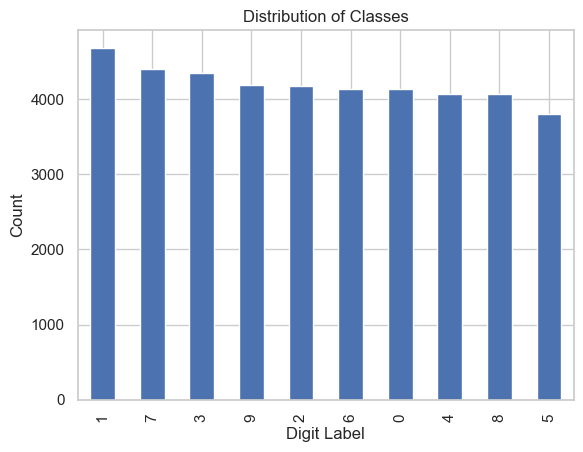

In [6]:
# Check for class imbalance
train_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.show()

In [7]:
# Summary of the pixel values
print(train_df.describe())

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0

- # Additional EDA for Preprocessing and Feature Selection

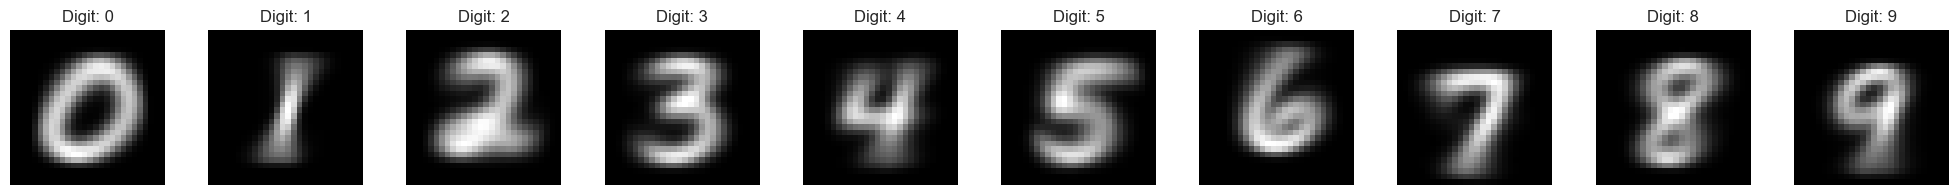

In [8]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    avg_img = train_df[train_df['label'] == i].drop('label', axis=1).mean().values.reshape(28,28)
    axes[i].imshow(avg_img, cmap='gray')
    axes[i].set_title(f"Digit: {i}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

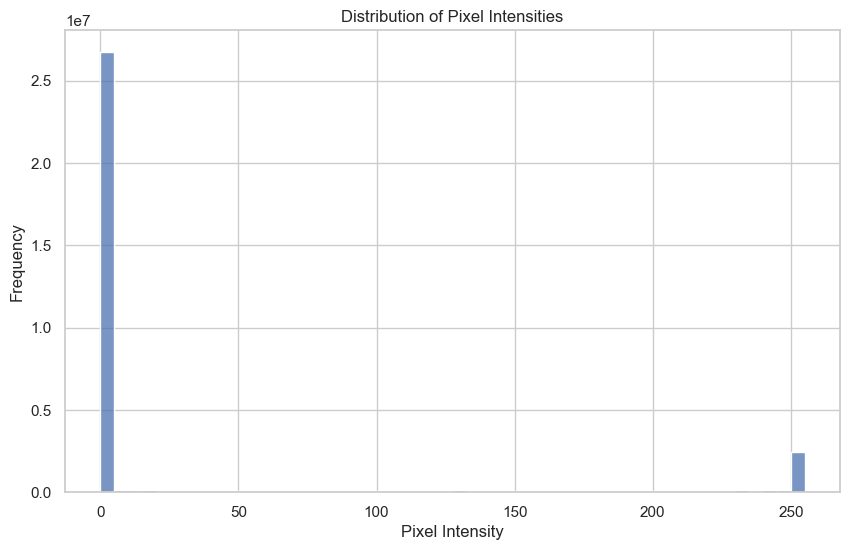

In [9]:
plt.figure(figsize=(10, 6))
# Flatten the pixel values of all images into a single array
pixel_values = train_df.drop('label', axis=1).values.flatten()
sns.histplot(pixel_values, bins=50, kde=False)
plt.title('Distribution of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

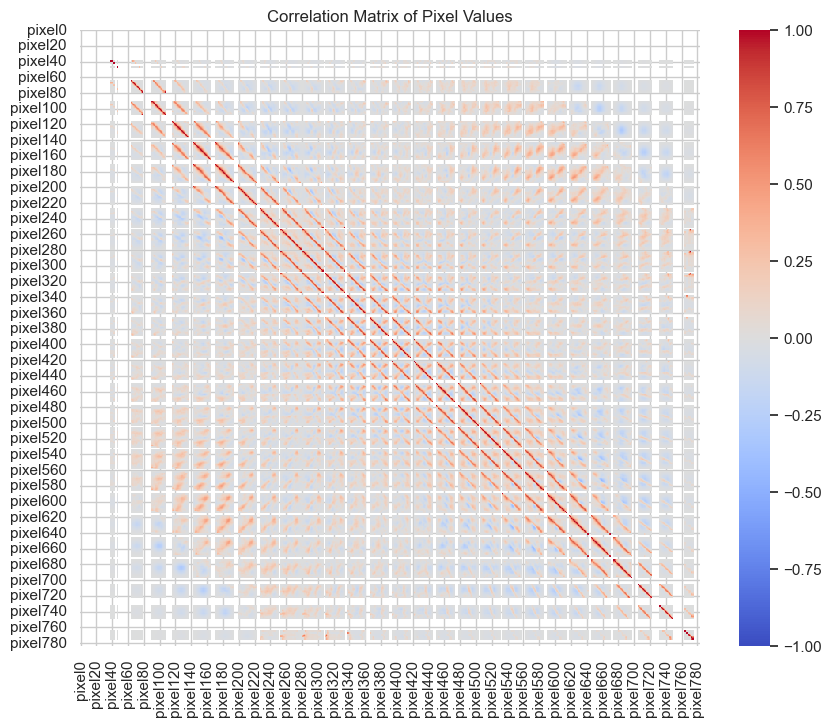

In [10]:
corr = train_df.sample(1000).drop('label', axis=1).corr()  # Sample to speed up computation
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', vmax=1.0, vmin=-1.0)
plt.title('Correlation Matrix of Pixel Values')
plt.show()

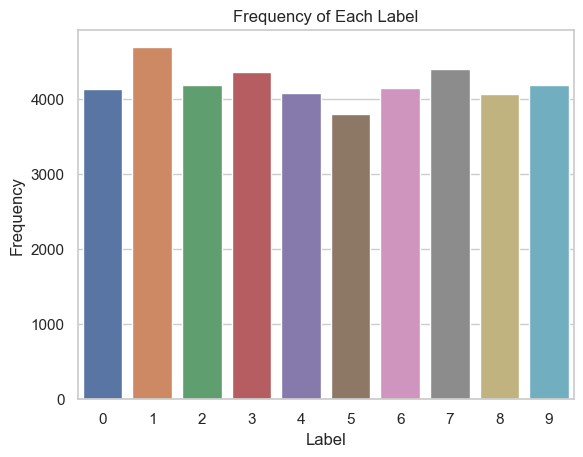

In [11]:
sns.countplot(x='label', data=train_df)
plt.title('Frequency of Each Label')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

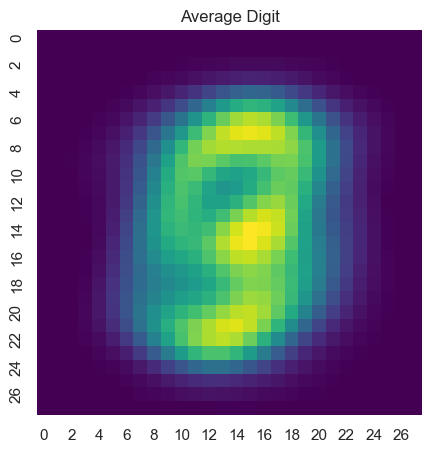

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(train_df.drop('label', axis=1).mean().values.reshape(28,28), cmap='viridis', square=True, cbar=False)
plt.title('Average Digit')
plt.show()

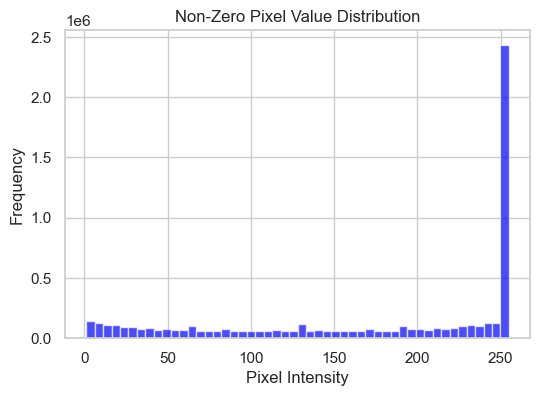

In [13]:
# Displaying basic statistics of the dataset for non-zero pixels
non_zero_pixels = train_df.drop('label', axis=1).values.flatten()
non_zero_pixels = non_zero_pixels[non_zero_pixels > 0]  # Filter out zero pixels
plt.figure(figsize=(6, 4))
plt.hist(non_zero_pixels, bins=50, color='blue', alpha=0.7)
plt.title('Non-Zero Pixel Value Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# 4) Data Processing

Normalize the Pixel Values

In [14]:
X_train = train_df.drop('label', axis=1) / 255.0
y_train = train_df['label']
X_test = test_df / 255.0  # Note: X_test normalization is shown for completeness

Split the Data into Training, Validation, and Test Sets

In [15]:
from sklearn.model_selection import train_test_split

# Split the training data into a smaller training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
# Printing the sizes of each dataset
print("Sizes of datasets after split:")
print(f"Training set (features): {X_train.shape}, Training set (labels): {y_train.shape}")
print(f"Validation set (features): {X_val.shape}, Validation set (labels): {y_val.shape}")
print(f"Test set (features): {X_test.shape}")  # Remember, X_test does not have labels in this context

Sizes of datasets after split:
Training set (features): (33600, 784), Training set (labels): (33600,)
Validation set (features): (8400, 784), Validation set (labels): (8400,)
Test set (features): (28000, 784)


# 5) Feature Engineering

Reshape Data for CNNs

In [17]:
# Reshape the data for CNNs
# The final dimension 1 indicates grayscale images. For RGB images, this would be 3.

X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)
X_val_reshaped = X_val.values.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.values.reshape(-1, 28, 28, 1)

print(f"Reshaped training data: {X_train_reshaped.shape}")
print(f"Reshaped validation data: {X_val_reshaped.shape}")
print(f"Reshaped test data: {X_test_reshaped.shape}")

Reshaped training data: (33600, 28, 28, 1)
Reshaped validation data: (8400, 28, 28, 1)
Reshaped test data: (28000, 28, 28, 1)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # Degree range for random rotations
    zoom_range=0.1,  # Randomly zooming inside pictures
    width_shift_range=0.1,  # Fraction of total width for horizontal shifts
    height_shift_range=0.1  # Fraction of total height for vertical shifts
)

# Fit the data generator to your training data
datagen.fit(X_train_reshaped)

# 6) Dimensional Reduction

Original number of features: 784
Reduced number of features: 2
Total variance explained by the 2 principal components: 0.17


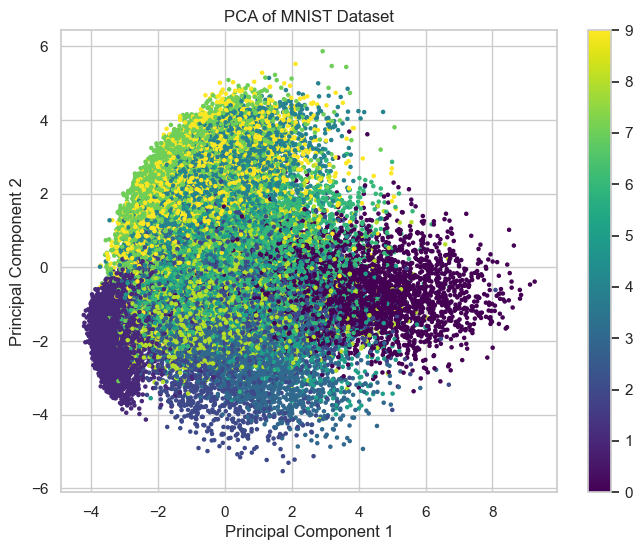

In [19]:
from sklearn.decomposition import PCA

# Original number of features
original_num_features = X_train.shape[1]
print(f"Original number of features: {original_num_features}")

# PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train)

# Reduced number of features (which will be 2 in this case)
reduced_num_features = X_train_pca.shape[1]
print(f"Reduced number of features: {reduced_num_features}")

# Total variance explained by the 2 principal components
total_variance_explained = np.sum(pca.explained_variance_ratio_)
print(f"Total variance explained by the 2 principal components: {total_variance_explained:.2f}")

# Plotting the first 2 principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=5)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST Dataset')
plt.show()

# 8) Model Creation

### 1) CNN

In [26]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout

y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train_reshaped, y_train_categorical, epochs=10, validation_data=(X_val_reshaped, y_val_categorical))

Epoch 1/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.1758 - accuracy: 0.9458 - val_loss: 0.0797 - val_accuracy: 0.9758
Epoch 2/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0564 - accuracy: 0.9821 - val_loss: 0.0501 - val_accuracy: 0.9846
Epoch 3/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0408 - val_accuracy: 0.9874
Epoch 4/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0379 - val_accuracy: 0.9865
Epoch 5/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0354 - val_accuracy: 0.9889
Epoch 6/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0360 - val_accuracy: 0.9882
Epoch 7/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0359 - 

### 2) Simple Neural Network

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

# Simple neural network model
model_simple_nn = Sequential([
    Flatten(input_shape=(784,)),  
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_simple_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_simple_nn.fit(X_train, y_train_categorical, epochs=10, validation_data=(X_val, y_val_categorical))

Epoch 1/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3221 - accuracy: 0.9096 - val_loss: 0.1941 - val_accuracy: 0.9436
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1471 - accuracy: 0.9571 - val_loss: 0.1478 - val_accuracy: 0.9573
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1027 - accuracy: 0.9697 - val_loss: 0.1214 - val_accuracy: 0.9620
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0757 - accuracy: 0.9779 - val_loss: 0.1122 - val_accuracy: 0.9662
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0596 - accuracy: 0.9824 - val_loss: 0.1150 - val_accuracy: 0.9644
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0.1023 - val_accuracy: 0.9695
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0357 - accuracy: 0.9896 - val_loss: 0.1063 - val_accuracy:

### 3) SVM (Support Vector Machine)

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model_svm = SVC()
model_svm.fit(X_train, y_train)

# Predict and evaluate
y_val_pred = model_svm.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.98      0.97      0.97       846
           3       0.97      0.96      0.96       937
           4       0.96      0.97      0.97       839
           5       0.97      0.97      0.97       702
           6       0.98      0.99      0.98       785
           7       0.98      0.97      0.97       893
           8       0.97      0.97      0.97       835
           9       0.96      0.96      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



## 4. Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Predict and evaluate
y_val_pred = model_rf.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.94      0.95       937
           4       0.96      0.97      0.97       839
           5       0.96      0.96      0.96       702
           6       0.97      0.99      0.98       785
           7       0.97      0.95      0.96       893
           8       0.96      0.96      0.96       835
           9       0.94      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



### 5. K-Nearest Neighbors (KNN)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Ensure X_val is a NumPy array and is C-contiguous
X_val = np.ascontiguousarray(X_val)

# Initialize and fit the KNN model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model_knn.predict(X_val)

# Print the classification report
print(classification_report(y_val, y_val_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.94      1.00      0.97       909
           2       0.99      0.94      0.96       846
           3       0.96      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.96      0.95      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.96      0.96       893
           8       0.99      0.93      0.96       835
           9       0.94      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.97      0.96      0.96      8400



# 9) Model Evaluation

In [31]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Simple Neural Network predictions
predictions_simple_nn = model_simple_nn.predict(X_val)
predictions_simple_nn_labels = np.argmax(predictions_simple_nn, axis=1)

# CNN predictions
predictions_cnn = model_cnn.predict(X_val_reshaped)  
predictions_cnn_labels = np.argmax(predictions_cnn, axis=1)

263/263 [==============================] - 1s 4ms/step


In [32]:
# Evaluation for Simple Neural Network
print("Simple Neural Network Evaluation")
print(classification_report(y_val, predictions_simple_nn_labels))
print(f"Accuracy: {accuracy_score(y_val, predictions_simple_nn_labels)}\n")

# Evaluation for CNN
print("CNN Evaluation")
print(classification_report(y_val, predictions_cnn_labels))
print(f"Accuracy: {accuracy_score(y_val, predictions_cnn_labels)}\n")

# Evaluation for SVM
predictions_svm = model_svm.predict(X_val)
print("SVM Evaluation")
print(classification_report(y_val, predictions_svm))
print(f"Accuracy: {accuracy_score(y_val, predictions_svm)}\n")

# Evaluation for Random Forest
predictions_rf = model_rf.predict(X_val)
print("Random Forest Evaluation")
print(classification_report(y_val, predictions_rf))
print(f"Accuracy: {accuracy_score(y_val, predictions_rf)}\n")

# Evaluation for KNN
predictions_knn = model_knn.predict(X_val)
print("KNN Evaluation")
print(classification_report(y_val, predictions_knn))
print(f"Accuracy: {accuracy_score(y_val, predictions_knn)}\n")

Simple Neural Network Evaluation
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.97      0.97      0.97       846
           3       0.96      0.97      0.96       937
           4       0.98      0.97      0.98       839
           5       0.97      0.96      0.97       702
           6       0.97      0.99      0.98       785
           7       0.98      0.97      0.97       893
           8       0.97      0.96      0.96       835
           9       0.96      0.97      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

Accuracy: 0.974047619047619

CNN Evaluation
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       816
           1       0.99      1.00      0.99       909
 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


SVM Evaluation
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.98      0.97      0.97       846
           3       0.97      0.96      0.96       937
           4       0.96      0.97      0.97       839
           5       0.97      0.97      0.97       702
           6       0.98      0.99      0.98       785
           7       0.98      0.97      0.97       893
           8       0.97      0.97      0.97       835
           9       0.96      0.96      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

Accuracy: 0.973452380952381



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest Evaluation
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.94      0.95       937
           4       0.96      0.97      0.97       839
           5       0.96      0.96      0.96       702
           6       0.97      0.99      0.98       785
           7       0.97      0.95      0.96       893
           8       0.96      0.96      0.96       835
           9       0.94      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

Accuracy: 0.9657142857142857



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Evaluation
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.94      1.00      0.97       909
           2       0.99      0.94      0.96       846
           3       0.96      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.96      0.95      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.96      0.96       893
           8       0.99      0.93      0.96       835
           9       0.94      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.97      0.96      0.96      8400

Accuracy: 0.9648809523809524



# 10) Hyperparameter Tuning

In [33]:
import tensorflow as tf
# pip install keras-tuner
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras_tuner import RandomSearch
#from kerastuner.tuners import RandomSearch

# Define a model-building function
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
                     kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
                     activation='relu',
                     input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
                     kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
                    activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  
    executions_per_trial=3,
    directory='my_dir',
    project_name='keras_tuner_cnn')

# Start hyperparameter search
tuner.search(X_train_reshaped, y_train_categorical,
             epochs=10,
             validation_data=(X_val_reshaped, y_val_categorical))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_reshaped, y_train_categorical, epochs=50, validation_data=(X_val_reshaped, y_val_categorical))

print(f"""
The hyperparameter search is complete. The optimal number of filters in the first convolutional layer is {best_hps.get('conv_1_filter')}, 
the optimal kernel size for the first convolutional layer is {best_hps.get('conv_1_kernel')}, 
the optimal number of filters in the second convolutional layer is {best_hps.get('conv_2_filter')}, 
the optimal kernel size for the second convolutional layer is {best_hps.get('conv_2_kernel')}, 
the optimal number of units in the dense layer is {best_hps.get('dense_units')}, 
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

C:\Users\shanu\AppData\Local\Temp\ipykernel_19876\2599708340.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Reloading Tuner from my_dir\keras_tuner_cnn\tuner0.json
Epoch 1/50
1050/1050 [==============================] - 23s 19ms/step - loss: 0.1767 - accuracy: 0.9463 - val_loss: 0.0639 - val_accuracy: 0.9812
Epoch 2/50
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0539 - accuracy: 0.9835 - val_loss: 0.0471 - val_accuracy: 0.9851
Epoch 3/50
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0496 - val_accuracy: 0.9844
Epoch 4/50
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0462 - val_accuracy: 0.9844
Epoch 5/50
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0420 - val_accuracy: 0.9857
Epoch 6/50
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0364 - val_accuracy: 0.9898
Epoch 7/50
1050/1050 [==============================] - 21s 20ms/ste

In [34]:
# Evaluate the model on the validation set
final_loss, final_accuracy = model.evaluate(X_val_reshaped, y_val_categorical)

# Print the final accuracy
print(f"Final model accuracy on validation set: {final_accuracy * 100:.2f}%")

263/263 [==============================] - 2s 6ms/step - loss: 0.0724 - accuracy: 0.9917
Final model accuracy on validation set: 99.17%


# 11) Model Comparison

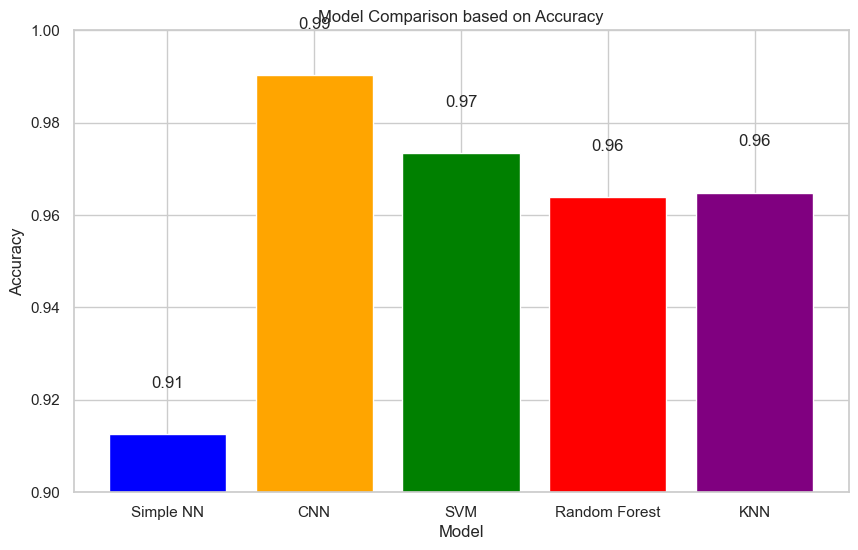

In [35]:
# Placeholder accuracy scores for each model
model_accuracies = {
    'Simple NN': 0.9126190476190477,  
    'CNN':  0.9902777671813965,  # After Tuning   
    'SVM': 0.973452380952381,        
    'Random Forest': 0.9639285714285715,  
    'KNN': 0.9648809523809524         
}

# Names of models
models = list(model_accuracies.keys())
# Corresponding accuracy scores
accuracies = list(model_accuracies.values())

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison based on Accuracy')
plt.ylim(0.9, 1)  

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha = 'center')

plt.show()

# 12) Final Model Selection

In [40]:
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

print(f"The best model based on accuracy is {best_model} with an accuracy of {best_accuracy*100:.0f}%.")

The best model based on accuracy is CNN with an accuracy of 99%.


# 13) Create Submission File

In [43]:
# Generate predictions for the test set
test_predictions = model.predict(X_test_reshaped)
# Convert predictions to labels
test_labels = np.argmax(test_predictions, axis=1)

875/875 [==============================] - 6s 7ms/step


In [44]:
# Generate predictions for the test set
test_predictions = model.predict(X_test_reshaped)
# Convert predictions to labels
test_labels = np.argmax(test_predictions, axis=1)

# Create a DataFrame with the ImageId and the predictions (labels)
submission_df = pd.DataFrame({
    'ImageId': range(1, len(test_labels) + 1),
    'Label': test_labels
})

# Save the submission file
submission_df.to_csv('submission_cnn.csv', index=False)

875/875 [==============================] - 6s 7ms/step


# 14) Create HDF5 File

In [45]:
# Assuming 'model' is your trained and tuned CNN model
model.save('my_cnn_model')

from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_cnn_model')

# Save as HDF5 file
model.save('my_cnn_model.h5')

# Load the HDF5 file
loaded_model_h5 = load_model('my_cnn_model.h5')

INFO:tensorflow:Assets written to: my_cnn_model\assets


INFO:tensorflow:Assets written to: my_cnn_model\assets



C:\Users\shanu\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
# Save the model in the TensorFlow SavedModel format (recommended)
model.save('new_cnn_model_savedmodel')

# Print a confirmation message
print("Model saved directory.")

INFO:tensorflow:Assets written to: new_cnn_model_savedmodel\assets


INFO:tensorflow:Assets written to: new_cnn_model_savedmodel\assets


Model saved directory.


In [47]:
import pickle

# Save the model to a file
with open('my_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model from a file
with open('my_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)